<a href="https://colab.research.google.com/github/lianaling/neural-networks-practice/blob/main/Pytorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Basics

[Reference link](https://www.marktechpost.com/2021/01/09/getting-started-with-pytorch-in-google-collab-with-free-gpu/)

## Pytorch Tensors

In [ ]:
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt

In [ ]:
x= torch.ones(3,2)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
x=torch.zeros(3, 2)
x

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

Random initialisation

In [ ]:
torch.manual_seed(2)
x = torch.rand(3, 2)
x

tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])

Generate tensor randomly from normal distribution

In [ ]:
x = torch.randn(3, 3)
x

tensor([[-2.1409, -0.5534, -0.5000],
        [-0.0815, -0.1633,  1.5277],
        [-0.4023,  0.0972, -0.5682]])

## Simple Tensor Operations

Slicing of tensors

In [ ]:
x = torch.tensor([[1, 2],
                 [3, 4],
                 [5, 6]])

print(x[:, 1]) # Every row, only the last column
print(x[0, :]) # Every column in the first row
y = x[1, 1] # Element in the first row and first column
print(y)

tensor([2, 4, 6])
tensor([1, 2])
tensor(4)


Reshape tensor

In [ ]:
x = torch.tensor([[1, 2],
                 [3, 4],
                 [5, 6]]) # 3 x 2

print(x)

y = x.view(2, 3) # 2 x 3
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


`-1` indicates that the shape will be inferred from previous dimensions (autoset col/row based on already-set row/col value)

In [ ]:
x = torch.tensor([[1, 2],
                 [3, 4],
                 [5, 6]]) # 3 x 2

print(x)

y = x.view(6, -1) # 6 x 1

print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [ ]:
x = torch.ones(3, 2)
y = torch.ones(3, 2)

print(x)
print(y)

# Add
z = x + y # Method 1
z = torch.add(x, y) # Method 2

print(z)

# Subtract
z = x - y # Method 1
torch.sub(x, y) # Method 2

print(z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


## Pytorch to Numpy

In [ ]:
x = torch.linspace(0 ,1, steps=5) # linspace: evenly spaced steps within range
x_np = x.numpy() # Convert tensor to numpy
print(type(x), type(x_np))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.random.randn(5) # Generate random numpy array
a_pt = torch.from_numpy(a) # Convert numpy array to tensor
print(type(a), type(a_pt))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


## CUDA Support

In [ ]:
print(torch.cuda.device_count())

1


In [ ]:
print(torch.cuda.get_device_name())

Tesla T4


Reference this GPU with variable to allocate all CUDA tensors on that device

In [ ]:
cuda0 = torch.device('cuda:0')

a = torch.ones(3, 2, device=cuda0) # Create tensor on GPU
b = torch.ones(3, 2, device=cuda0)

c = a + b

print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


Move results to CPU

In [ ]:
c = c.cpu()

print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


## Automatic Differentiation

AKA autograd in Pytorch.

Automatic gradient computation on all operations on tensors.

Backprop defined by how code is run.

In [ ]:
x = torch.ones([3, 2], requires_grad=True) # To track all operations performing on that tensor
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
y = x + 5
y

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)

Because `y` was created as a result of operation on `x`, it has `grad_fn`.

In [ ]:
z = y * y + 1
z

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)

In [ ]:
t = torch.sum(z) # Adding all the values in z
t

tensor(222., grad_fn=<SumBackward0>)

## Backpropagation

In [ ]:
t.backward() # Perform backprop. No output is printed

Print gradients `d(t)/dx`

In [ ]:
print(x.grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


`x,grad` will give the partial derivative of `t` with respect to `x`.

[Vector, Matrix, and Tensor Derivatives](http://cs231n.stanford.edu/vecDerivs.pdf)

[PyTorch 101, Part 1: Understanding Graphs, Automatic Differentiation and Autograd](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

```py
d(t)/dx = d(t)/dz * dz/dy * dy/dx
= sum(z) * (y * y + 1) * (x + 5)
= (?) * (2y)  * 1
= 2y + 1 (correct answer)

dt/dz = (not sure how)

dz/dy = y^2 + 1
= 2y

dy/dx = x + 5
= 1

```

An easier example of autograd

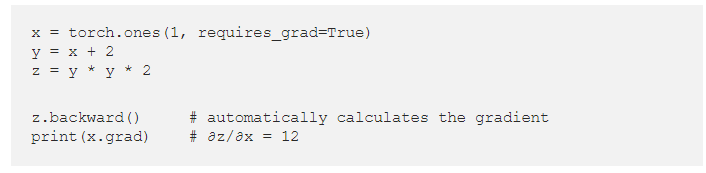

```py
dz/dx = dz/dy * dy/dx
dz/dx = 4y * 1

# Working
dz/dy = 2y^2
dz/dy = 4y

dy/dx = 1

# When x = 1
y = 1 + 2
y = 3

# Answer
dz/dx = 4 * 3 = 12
```